# <center>Convolutional Neural Network</center>

---

> A convolutional neural network (CNN or ConvNet), is a network architecture for deep learning which learns directly from data, eliminating the need for manual feature extraction.
> CNNs are particularly useful for finding patterns in images to recognize objects, faces, and scenes. They can also be quite effective for classifying non-image data such as audio, time series, and signal data.
> Applications that call for object recognition and computer vision — such as self-driving vehicles and face-recognition applications — rely heavily on CNNs. - [MathWorks](https://www.mathworks.com/discovery/convolutional-neural-network-matlab.html)


## <center>Import required libraries</center>

In [1]:
import tensorflow as tf
import tensorflow.keras as keras

### <center>Check tensorflow version</center>

In [2]:
print(tf.__version__)

2.9.1


## <center>Step I: Data preprocessing</center>

### <center>Preprocessing the training set</center>

In [3]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255, 
                                                            shear_range = 0.2,
                                                            zoom_range = 0.2,
                                                            horizontal_flip = True)

train_dataset = train_datagen.flow_from_directory('datasets/small_dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 10 images belonging to 2 classes.


### <center>Preprocessing the testing set</center>

In [4]:
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

test_dataset = test_datagen.flow_from_directory('datasets/small_dataset/test_set',
                                               target_size = (64, 64),
                                               batch_size = 32,
                                               class_mode = 'binary')

Found 10 images belonging to 2 classes.


## <center>Part II: Building the Convolutional Neural Network</center>

### <center>Initializing the <abbr title = "Convolutional Neural Network">CNN</abbr></center>

In [5]:
cov_net = keras.models.Sequential() 

### <center>Step I: Convolution</center>

In [6]:
cov_net.add(keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu", input_shape = [64, 64, 3]))

### <center>Step II: Pooling</center>

In [7]:
cov_net.add(keras.layers.MaxPool2D(pool_size = 2, strides = 2))

#### <center>Add a second convolution and pooling layer</center>

In [8]:
cov_net.add(keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu"))
cov_net.add(keras.layers.MaxPool2D(pool_size = 2, strides = 2))

### <center>Step III: Flattening</center>

In [9]:
cov_net.add(keras.layers.Flatten())

### <center>Step IV: Full Connection</center>

In [10]:
cov_net.add(keras.layers.Dense(units = 128, activation = "relu"))

### <center>Step V: Output layer</center>

In [11]:
cov_net.add(keras.layers.Dense(units = 1, activation = "sigmoid"))

## <center>Part III: Training the <abbr title = "Convolutional Neural Network">CNN</abbr></center>

### <center>Compiling the <abbr title = "Convolutional Neural Network">CNN</abbr></center>

In [12]:
cov_net.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

### <center>Training and testing the <abbr title = "Convolutional Neural Network">CNN</abbr></center>

In [13]:
cov_net.fit(x = train_dataset, validation_data = test_dataset, epochs = 50)

Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 0.6948 - accuracy: 0.5000 - val_loss: 1.1321 - val_accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 1s 870ms/step - loss: 1.1216 - accuracy: 0.5000 - val_loss: 0.7263 - val_accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 1s 639ms/step - loss: 0.6449 - accuracy: 0.7000 - val_loss: 0.7728 - val_accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 1s 634ms/step - loss: 0.7410 - accuracy: 0.5000 - val_loss: 0.7719 - val_accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 1s 639ms/step - loss: 0.7440 - accuracy: 0.5000 - val_loss: 0.7411 - val_accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 1s 649ms/step - loss: 0.7160 - accuracy: 0.5000 - val_loss: 0.7175 - val_accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 1s 615ms/step - loss: 0.6817 - accuracy: 0.5000 - val_loss: 0.7071 - val_accuracy: 0.5000
Epoch 8/50
1/1 [=======

## <center>Step IV: Making predictions</center>

1/1 [==============================] - 0s 433ms/step
dog


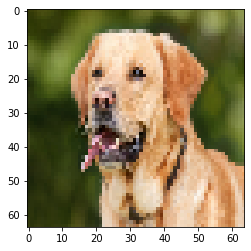

In [14]:
import matplotlib.pyplot as plt
import numpy as np

test_image = keras.preprocessing.image.load_img('datasets/small_dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image_copy = test_image
test_image = keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cov_net.predict(test_image)

prediction = "dog" if result[0][0] == 1 else "cat"
plt.imshow(np.asarray(test_image_copy))
print(prediction)